In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [3]:
df = pd.read_csv('cleaned_reddit_new.csv')

In [4]:
df = df[df['subreddit'].isin(['mentalhealth', 'COVID19_support'])==False]

In [5]:
df

subreddit              author        date  \
0          conspiracy            catvlyst  2018/12/17   
1          conspiracy  When_The_Dank_Hits  2018/12/17   
2          conspiracy       freethinker78  2018/12/17   
3          conspiracy           MrBobosky  2018/12/17   
4          conspiracy           KodiakDog  2018/12/17   
...               ...                 ...         ...   
1107297  suicidewatch         deso0000007  2020/04/20   
1107298  suicidewatch      yourstoxically  2020/04/20   
1107299  suicidewatch              acshit  2020/04/20   
1107300  suicidewatch      Haunting-Maybe  2020/04/20   
1107301  suicidewatch   seafoamangeltears  2020/04/20   

                                                      post  label  num_char  \
0        My argument against the annunaki narrative One...      0      1249   
1        diagram of all involved in 911 is there a diag...      0       103   
2        Is the US government analyzing online comments...      0      1060   
3        Who owns the media? It’s clear that many compa...      0       709   
4        [Discussion] Top Secret Pharmaceuticals Does a...      0      1279   
...                                                    ...    ...       ...   
1107297  But I want help doing it Tired of everyone say...      1       311   
1107298  Nothing to live for The ONLY reason I am alive...      1      1147   
1107299  I’m going to fucking kill myself 18 years too ...      1        75   
1107300  I’m going to pieces All I’ve done for about a ...      1       591   
1107301  sigh it's been a wild couple of weeks...i'm ve...      1       526   

                                            text_processed  \
0        my argument against the annunaki narrative one...   
1        diagram of all involved in is there a diagram ...   
2        is the us government analyzing online comments...   
3        who owns the media it is clear that many compa...   
4        discussion top secret pharmaceuticals does any...   
...                                                    ...   
1107297  but i want help doing it tired of everyone say...   
1107298  nothing to live for the only reason i am alive...   
1107299  i am going to fucking kill myself years too lo...   
1107300  i am going to pieces all i have done for about...   
1107301  sigh it is been a wild couple of weeks i m ver...   

        mentioned_usernames  num_mentioned_usernames  num_mentioned_urls  ...  \
0                       NaN                        0                   0  ...   
1                       NaN                        0                   0  ...   
2                       NaN                        0                   1  ...   
3                       NaN                        0                   0  ...   
4                       NaN                        0                   0  ...   
...                     ...                      ...                 ...  ...   
1107297                 NaN                        0                   0  ...   
1107298                 NaN                        0                   0  ...   
1107299                 NaN                        0                   0  ...   
1107300                 NaN                        0                   0  ...   
1107301                 NaN                        0                   0  ...   

        num_word  processed_num_word num_mentioned_expressions  \
0            207                 219                         0   
1             20                  17                         0   
2            153                 152                         0   
3            124                 134                         0   
4            200                 209                         0   
...          ...                 ...                       ...   
1107297       56                  61                         0   
1107298      225                 228                         0   
1107299       16                  17                         0   


## Figure 1: Distribution of Posts by Subreddit

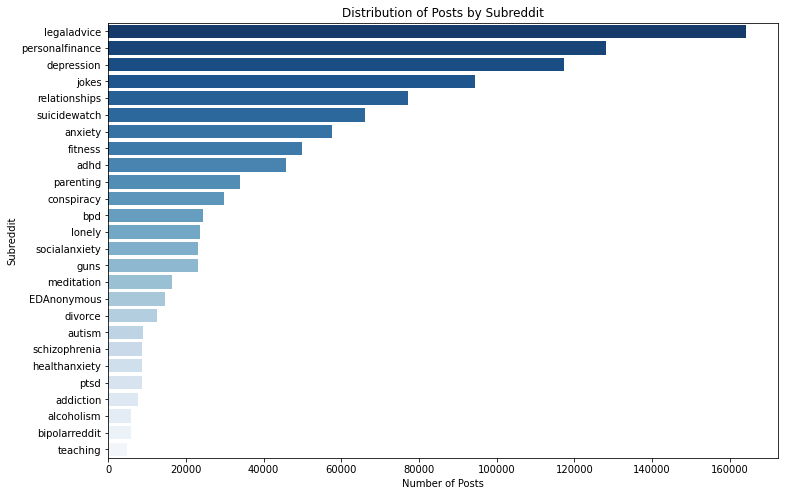

In [6]:
plt.figure(figsize=(12,8))
sns.countplot(y="subreddit", data=df, order=df['subreddit'].value_counts().index, palette="Blues_r")
plt.title("Distribution of Posts by Subreddit")
plt.xlabel("Number of Posts")
plt.ylabel("Subreddit")
plt.show()

## Figure 2: Distribution of Post Lengths

In [10]:
post_lengths = df['post'].apply(len)

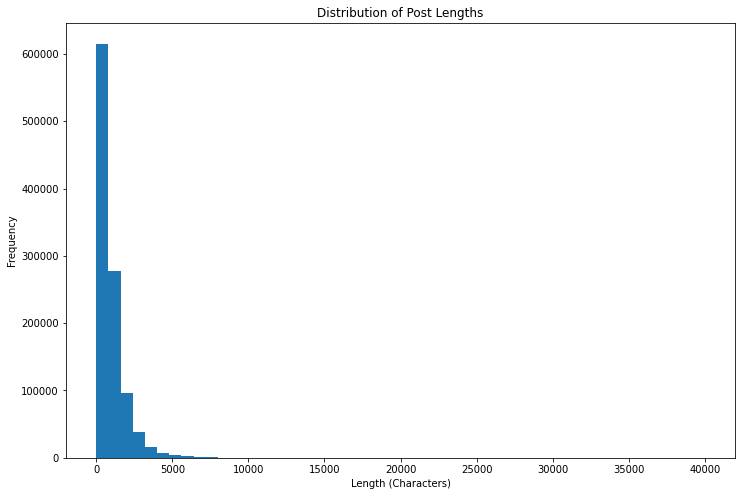

In [11]:
plt.figure(figsize=(12,8))
plt.hist(post_lengths, bins=50)
plt.title('Distribution of Post Lengths')
plt.xlabel('Length (Characters)')
plt.ylabel('Frequency')
plt.show()

## Figure 3: Number of Mental Health vs Non-Mental Health Posts Over Time

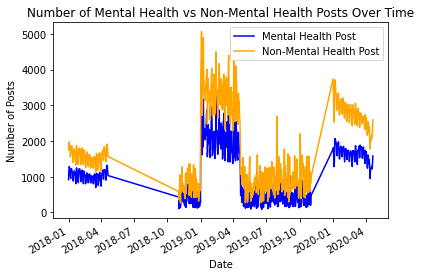

In [9]:
df['date'] = pd.to_datetime(df['date'])

grouped = df.groupby(['date', 'label']).size().reset_index(name='count')

pivot = grouped.pivot(index='date', columns='label', values='count')

colors = ['blue', 'orange']
ax = pivot.plot(kind='line', stacked=True, color=colors)
ax.legend(['Mental Health Post', 'Non-Mental Health Post'])
plt.title('Number of Mental Health vs Non-Mental Health Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.show()

## Figure 4: Word Cloud - Most Common Relevant Words Associated with each Subreddit

In [7]:
def get_word_cloud(subreddit):
    text = ' '.join(df[df['subreddit']==subreddit]['post'].tolist())

    # remove stop words
    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(text)

    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(f'Most Common Relevant Words Associated with {subreddit.upper()}')
    plt.show()

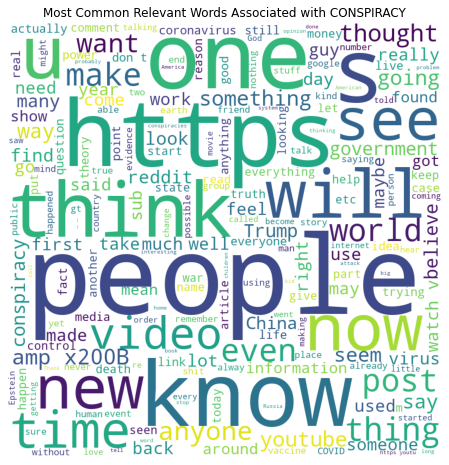

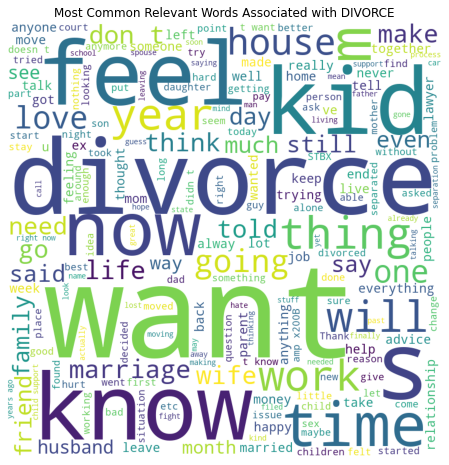

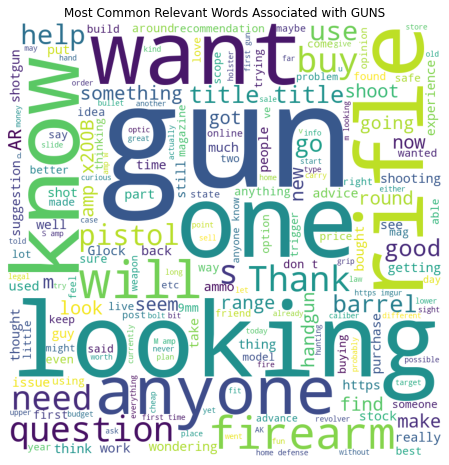

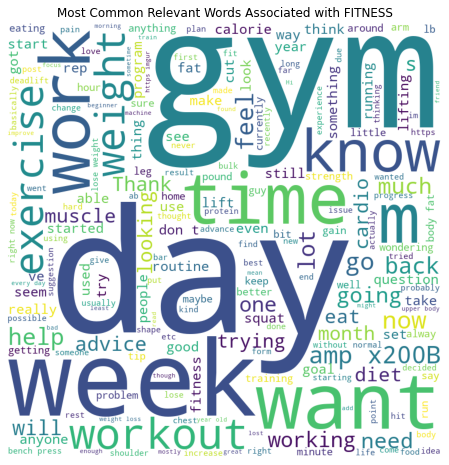

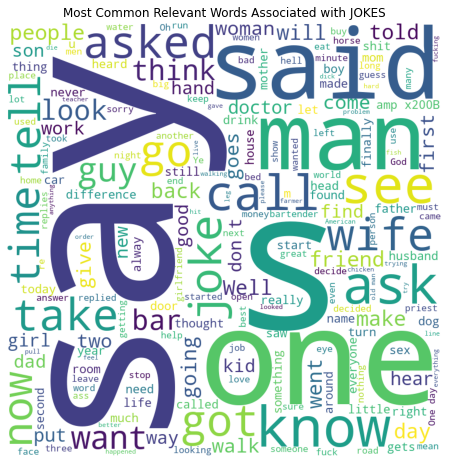

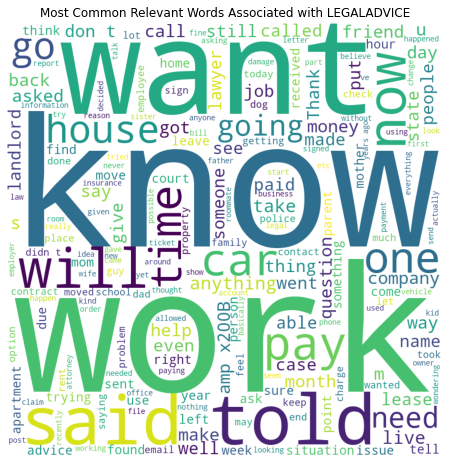

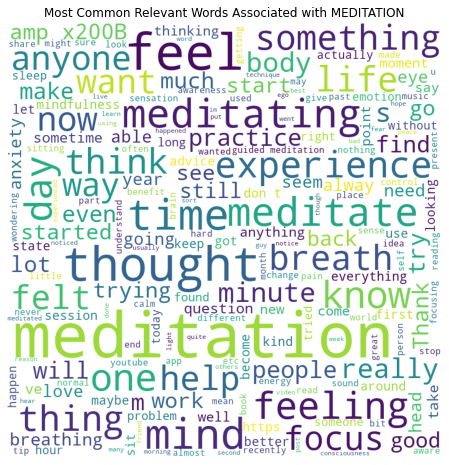

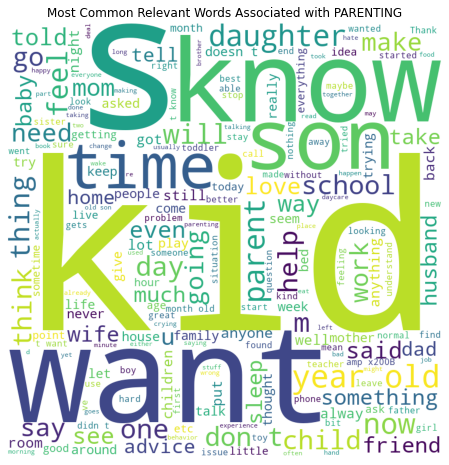

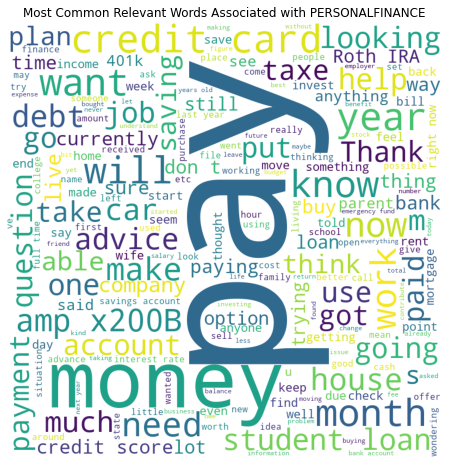

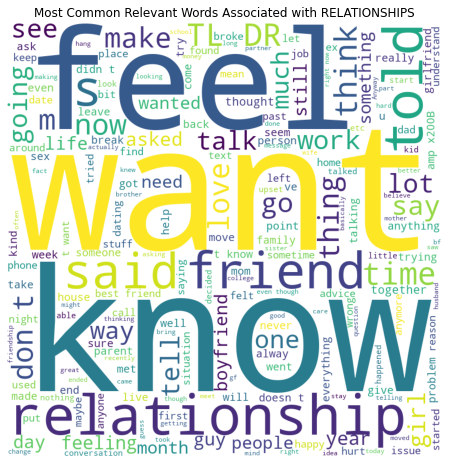

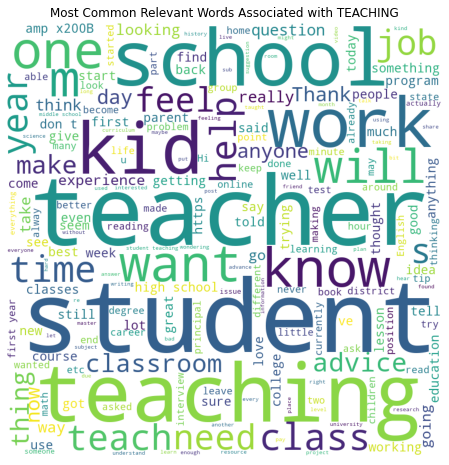

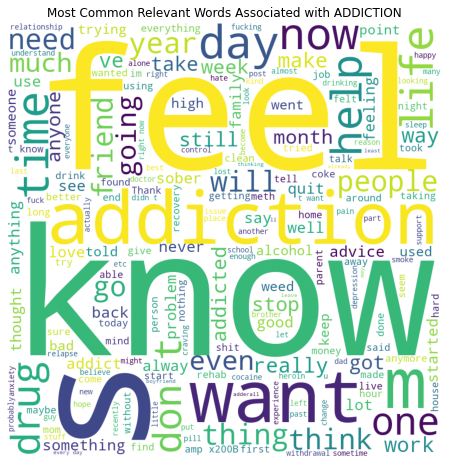

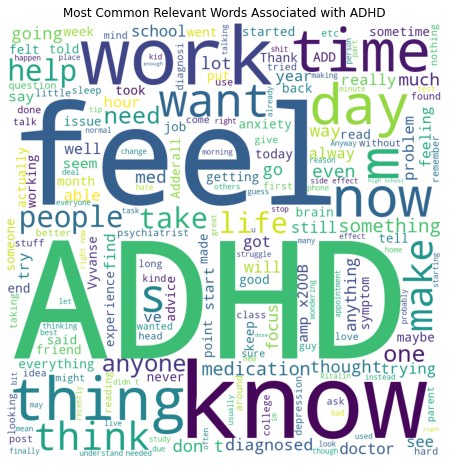

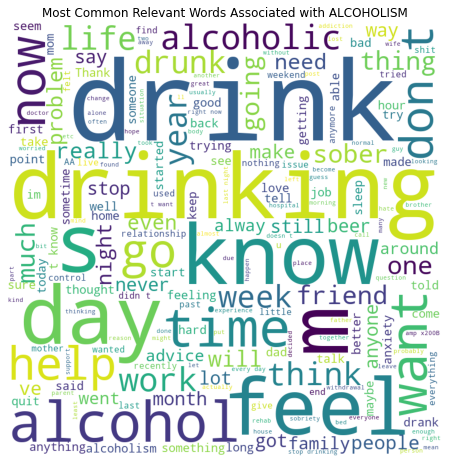

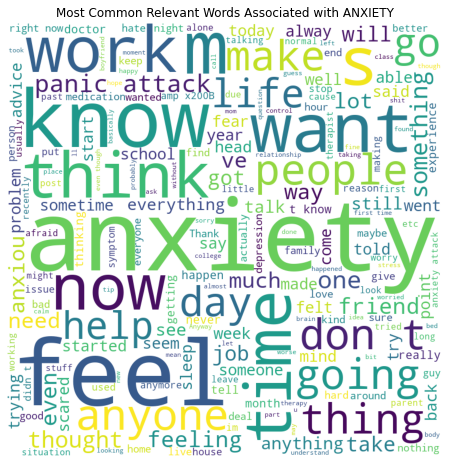

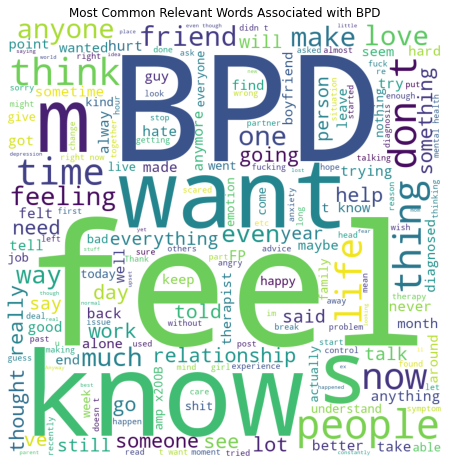

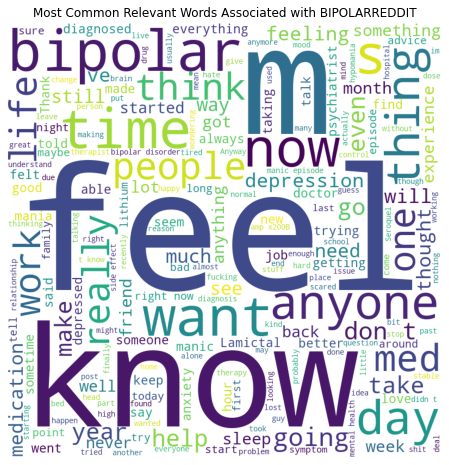

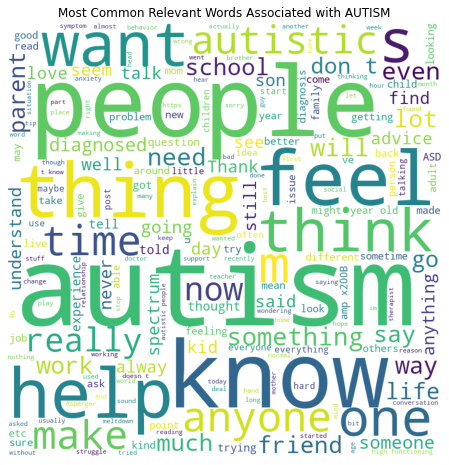

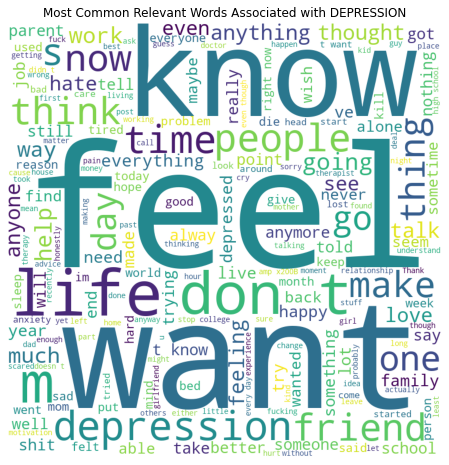

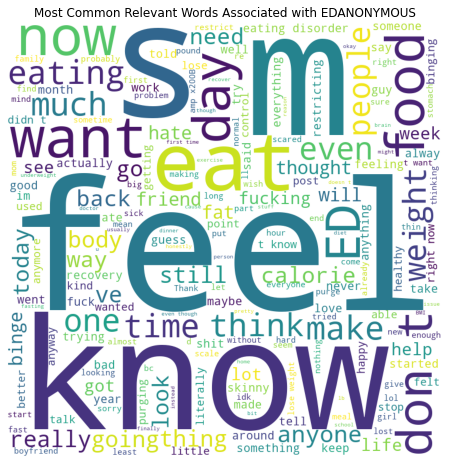

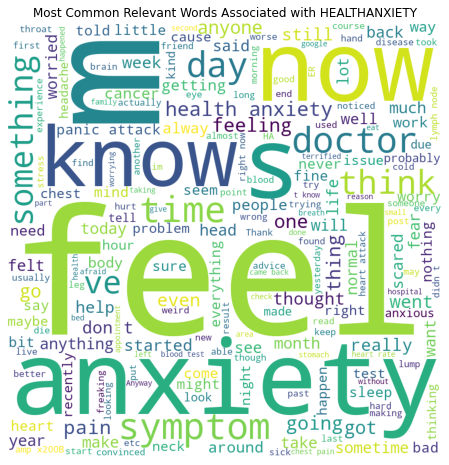

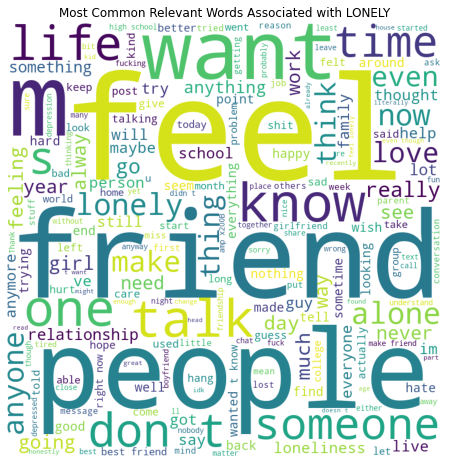

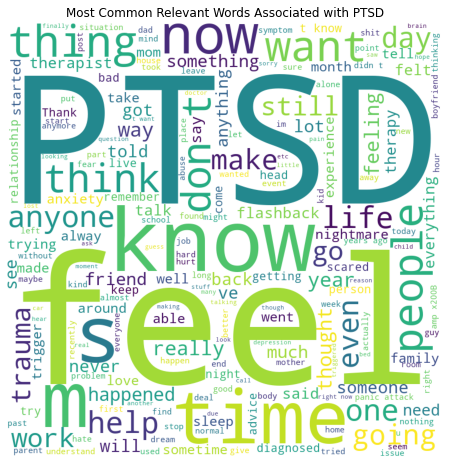

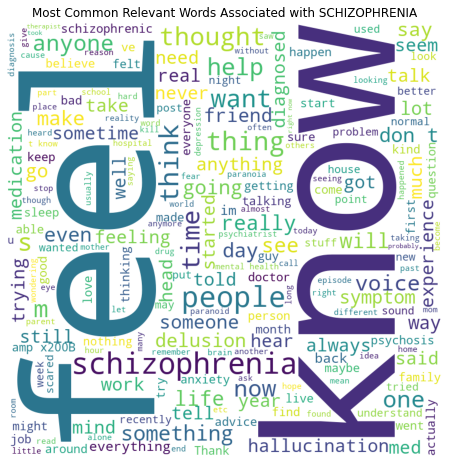

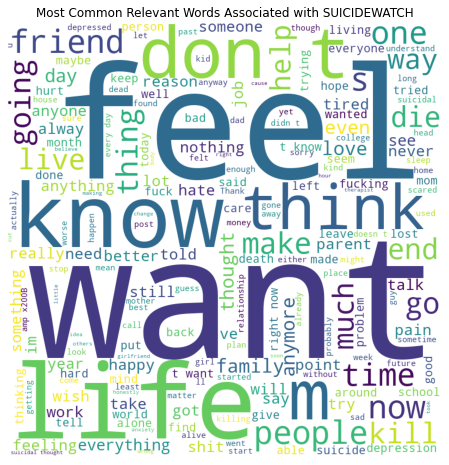

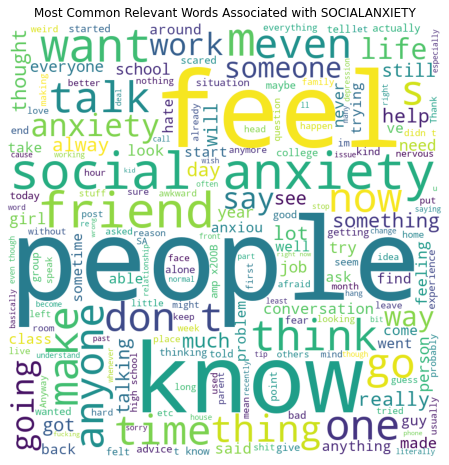

In [8]:
for subreddit in df['subreddit'].unique().tolist():
    get_word_cloud(subreddit=subreddit)